## Start R code here

In [1]:
## Functions to read in data

In [8]:
read_r2_matrix <- function(r2_path){
    r2_df = read.table(r2_path, sep="\t", )
    r2_matrix <- data.matrix(r2_df) 
    return(r2_matrix)
}

In [9]:
get_bim <- function(bim_path){
    bim = read.table(bim_path, sep = '\t')
    names(bim) = c('chr', 'SNP', 'cm', 'bp', 'A1', 'A2')
    return(bim)
    }

In [10]:
get_fam <- function(fam_path){
    fam = read.table(fam_path, sep = ' ')
    names(fam) = c('FID', 'IID', 'fatherID', 'motherID', 'sex', 'phenotype')
    return(fam)
    }

In [11]:
estimate_Ne <- function(mean_r2, S){
    adj1_r2 = mean_r2 * (S/(S-1))**2
    adj2_r2 = adj1_r2 - 0.0018 - 0.907/S - 4.44/(S**2)
    Ne_est = (0.308 + sqrt(.308**2 - 2.08*adj2_r2))/(2*adj2_r2)
    return(Ne_est)
}

In [29]:
get_Ne <- function(base_path){
    # load files
    r2_path  = paste(base_path, '.ld', sep ='')
    bim_path = paste(base_path, '.bim', sep ='')
    fam_path = paste(base_path, '.fam', sep ='')
    pop_mat = read_r2_matrix(r2_path)
    pop_bim = get_bim(bim_path)
    pop_fam = get_fam(fam_path)
    
    # get sample size
    S = nrow(pop_fam)
    
    # print the number of loci 
    #print (dim(pop1_mat))
    # exclude loci on the same chromosome
    for (CH in 1:26){
        my_idx = which(pop_bim$chr==CH)
        pop_mat[my_idx, my_idx] <- NA
    }
    # upper triangle
    r2_vals = pop_mat[upper.tri(x = pop_mat, diag = FALSE)]
    # remove NA values
    r2_vals = r2_vals[!is.na(r2_vals)]
    
    mean_r2 = mean(r2_vals)
    
    #Ne_basic = 1.0/(3*mean_r2 - 3.0/S)
    Ne_est = estimate_Ne(mean_r2=mean_r2, S=S)
    
    print(Ne_est)
    return (list(Ne_est = Ne_est, r2_matrix = pop_mat))
}

In [32]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

[1] 1973.89
[1] 7161.65
[1] 2059.567
[1] 9087.463
[1] 2876.705
[1] 1899.917


## Plot the LD matrices

In [35]:
library(lattice)

In [50]:
pal <- colorRampPalette(c("white", "red"), space = "rgb")
lp1 = levelplot(my_Ne$r2_matrix, main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)

pop_mat = read_r2_matrix("./work/Puget_EVEN.ld")
lp2 = levelplot(pop_mat[150:250, 150:250], main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = TRUE)

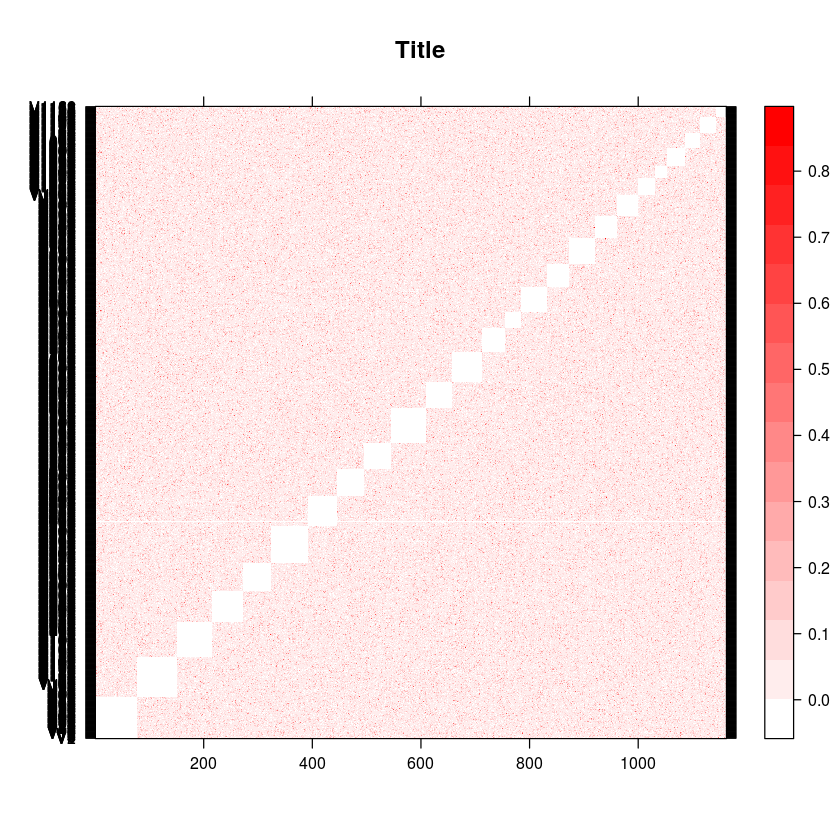

In [52]:
lp1

In [51]:
trellis.device(device="png", filename="./plots/Puget_EVEN.ld.png")
print(lp1)
dev.off()
trellis.device(device="png", filename="./plots/Puget_EVEN.raw.ld.png")
print(lp2)
dev.off()

png 
  2

png 
  2

In [ ]:
# 

In [31]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

[1] 1973.89
[1] 6700.281
[1] 2059.567
[1] 9087.463
[1] 2876.705
[1] 5276.334


In [30]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

[1] 2003.273
[1] 3691.296
[1] 2059.567
[1] 9087.463
[1] 2876.705
[1] 1805.562


In [94]:
pop1_mat = read_r2_matrix("./pink_data_pop_6_clean.ld")
head(pop1_mat)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V1254,V1255,V1256,V1257,V1258,V1259,V1260,V1261,V1262,V1263
1.0000000,0.04775940,0.19996600,0.064748200,0.0407674,0.087003800,0.04775940,0.020894800,0.00208865,0.08700380,⋯,0.122766000,0.1683690,0.0647482,0.075182600,0.14568300,0.1317460,0.0647482,0.00336102,0.000992063,0.004174400
0.0477594,1.00000000,0.09523810,0.001426740,0.0267541,0.183438000,1.00000000,0.159388000,0.10995400,0.12828000,⋯,0.001016590,0.0400000,0.0679245,0.030312400,0.03805030,0.0550189,0.1558130,0.01535120,0.164204000,0.017031600
0.1999660,0.09523810,1.00000000,0.035578700,0.0708104,0.009862280,0.05704860,0.000312153,0.02205880,0.00210084,⋯,0.001584690,0.0792079,0.1307190,0.050687100,0.14721200,0.0494412,0.0662305,0.02392990,0.076923100,0.095703100
0.0647482,0.00142674,0.03557870,1.000000000,0.1296520,0.000146821,0.00142674,0.013741000,0.19025700,0.12347700,⋯,0.032258100,0.0127451,0.0816327,0.001402090,0.00510204,0.3148190,0.0816327,0.00638248,0.042016800,0.005027230
0.0407674,0.02675410,0.07081040,0.129652000,1.0000000,0.040767400,0.00830599,0.034450400,0.05123340,0.07462270,⋯,0.000632511,0.0192975,0.0196078,0.251609000,0.01960780,0.0243245,0.0441176,0.10364100,0.003348210,0.009131490
0.0870038,0.18343800,0.00986228,0.000146821,0.0407674,1.000000000,0.11147600,0.063315100,0.01137150,0.02282490,⋯,0.067068900,0.0101750,0.0647482,0.000494261,0.06474820,0.1871250,0.0287770,0.00224994,0.013950900,0.000456575


In [97]:
pop1_bim = get_bim("./pink_data_pop_1_clean.bim")
tail(pop1_bim)

,chr,SNP,cm,bp,A1,A2
1530,26,58150,113.06,7815,1,2
1531,26,62696,113.06,7816,2,1
1532,26,32416,120.88,7819,2,1
1533,26,4090,122.50,7821,2,1
1534,26,3585,127.12,7823,2,1
1535,26,53099,127.12,7824,1,2


In [28]:
pop1_fam = get_fam("./pink_data_pop_1_clean.fam")
head(pop1_fam)

FID,IID,fatherID,motherID,sex,phenotype
pop_1,PKOPE91T_0001.count,0,0,0,-9
pop_1,PKOPE91T_0002.count,0,0,0,-9
pop_1,PKOPE91T_0003.count,0,0,0,-9
pop_1,PKOPE91T_0005.count,0,0,0,-9
pop_1,PKOPE91T_0006.count,0,0,0,-9
pop_1,PKOPE91T_0007.count,0,0,0,-9


In [113]:
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_1_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_2_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_3_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_4_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_5_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_6_clean")

[1] 145.782 549.992
[1] 147.9397 588.3712
[1] 137.2165 560.5605
[1]   69.01978 4120.40813
[1] 140.5395 471.3075
[1] 101.8005 393.2870


In [115]:
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_1_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_2_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_3_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_4_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_5_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_6_clean")

[1] 154.9697 748.2764
[1] 158.2771 849.7393
[1] 149.3132 924.0974
[1]  127.3471 -126.6364
[1] 149.4358 617.5088
[1]  125.8904 3599.8434


In [56]:
#library(dplyr)

In [69]:
library(ggplot2, lib.loc = '/home/ryan/anaconda2/lib/R/library/')

In [71]:
library(lattice)

In [103]:
mean(my_Ne$r2_matrix, na.rm = TRUE)

[1] 0.06253545

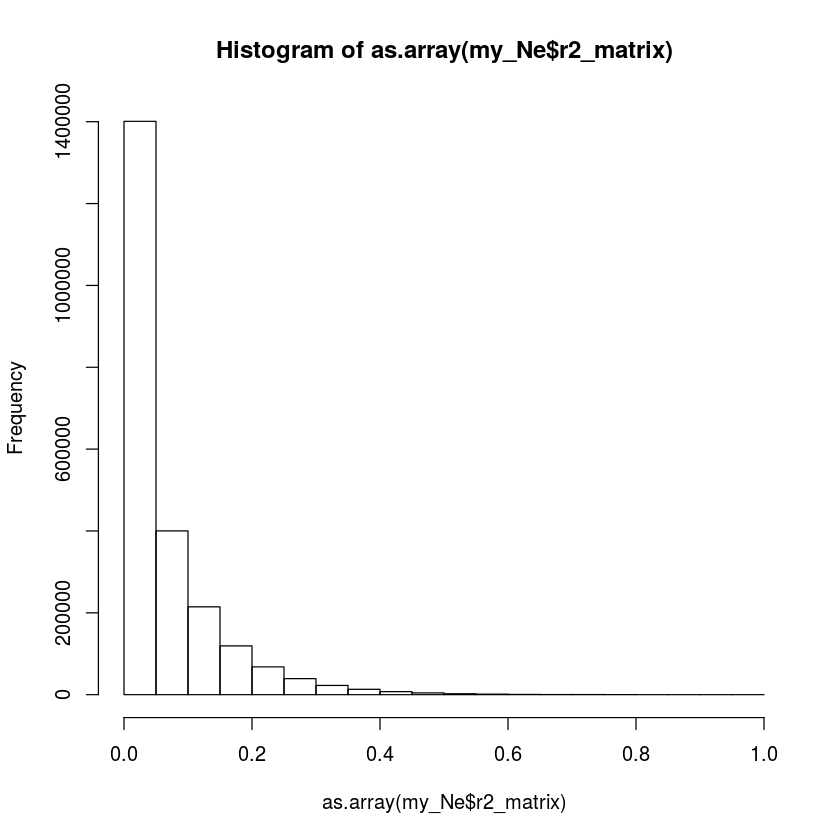

In [101]:
hist(as.array(my_Ne$r2_matrix))

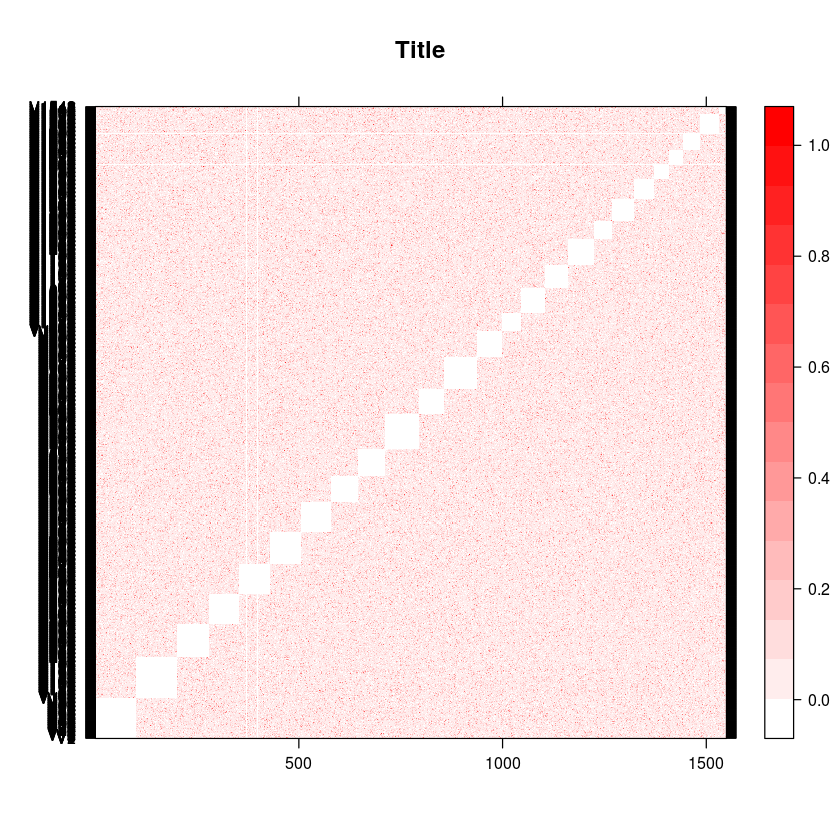

In [99]:
pal <- colorRampPalette(c("white", "red"), space = "rgb")
levelplot(my_Ne$r2_matrix, main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)

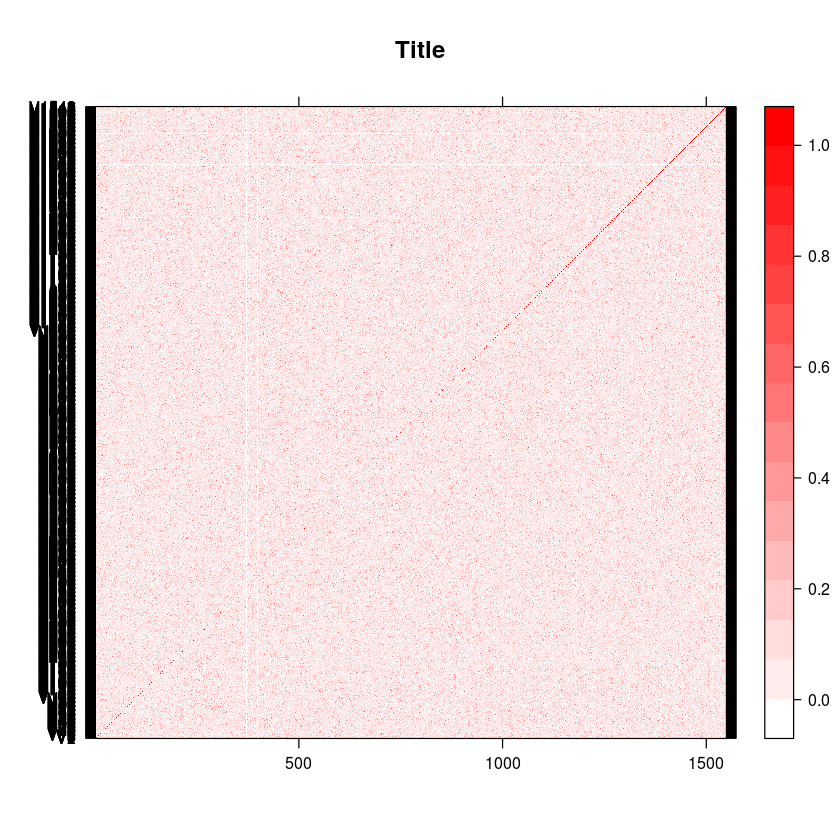

In [100]:
levelplot(read_r2_matrix('./exercise/pink_data_pop_4_clean.ld'), main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)
